In [14]:
using Plots
using Statistics
using LinearAlgebra
using JSON

include("readclassjson.jl");

In [3]:
# ; wget http://ee263.stanford.edu/hw/bs_det_data.json -P data


Apply the method to the signal in the file bs_det_data.m, which contains a matrix Y, whose columns are $y_{t}$. Give the weight vector $w$ that you find. Plot a histogram of the values of $w^{\top} y_{t}$ using hist $\left(w^{\prime} * Y, 50\right)$. You'll know you're doing well if the result has two peaks, one negative and one positive. Once you've chosen $w,$ a reasonable guess of $s_{t}$ (or, possibly, its negative $-s_{t}$ ) is given by
$$
\tilde{s}_{t}=\operatorname{sign}\left(w^{\top} y_{t}\right), \quad t=1, \ldots, T
$$
where $\operatorname{sign}(u)$ is +1 for $u \geq 0$ and -1 for $u<0 .$ The file bs_det_data.m contains the original signal, as a row vector s. Give your error rate, i.e., the fraction of times for which $\tilde{s}_{t} \neq s_{t} .$ (If this is more than $50 \%,$ you are welcome to flip the sign on $\left.w .\right)$

In [2]:
bs = readclassjson("data/bs_det_data.json")

Dict{Any,Any} with 3 entries:
  "Y" => [0.156257 -2.77561 … -0.36302 -2.90386; -4.33795 2.18019 … -2.85869 -2…
  "T" => 1000
  "s" => [1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0  …  1.0, 1.0, 1…

In [63]:
Y = bs["Y"]
s = bs["s"];
T = bs["T"];

In [64]:
F = svd((1/sqrt(T))*Y')
w = F.V[:,1] ./ F.S[1]

20-element Array{Float64,1}:
 -0.03224530108439399
 -0.09600678070245454
  0.012300376696347072
  0.01986756385864285
 -0.06334718004403035
  0.06626859793251942
  0.07769274840286275
 -0.0037483870758432056
  0.016515994508527355
  0.012568547850148711
 -0.01399140311921364
  0.03722671802828679
 -0.03154105297560524
  0.12525945464545385
 -0.013700224050555114
  0.010466260444779892
  0.06061734279257338
  0.010108430511189877
 -0.009208138818350359
 -0.04747941079048248

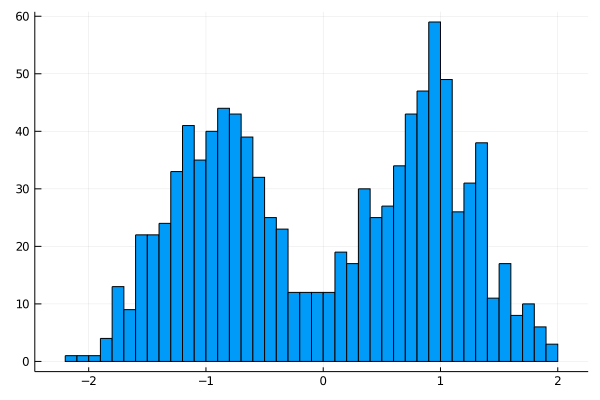

In [68]:
histogram(Y'*w, bins=50, label=false)

Error rate

In [66]:
sum(sign.(Y'*w) .!= s) / length(s)

0.029

Thus we have a 2.9% error rate